In [124]:
#%pip install mlxtend --upgrade

In [125]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv
import time
import sklearn.utils

In [126]:
with open('mashroom.csv') as f:
    reader = csv.reader(f)
    my_list = list(reader)
#print("csv to list:",my_list)

In [127]:
te = TransactionEncoder()
array = te.fit(my_list).transform(my_list)
df = pd.DataFrame(array, columns=te.columns_)
df.shape

(8124, 119)

In [128]:

fptime = []
aptime = []
th = []
i = 1000

while i<df.shape[0]:
  df = sklearn.utils.shuffle(df)
  row =df.head(i)
  start_time = time.time()
  frequent = fpgrowth(row, min_support=0.3)
  end = time.time() - start_time
  fptime.append(end)

  start_time = time.time()
  apfrequent = apriori(row, min_support=0.3)
  end = time.time() - start_time
  aptime.append(end)
  th.append(i)
  i = i + 1000

In [129]:
print("Time",fptime)
print("Threshold",th)

Time [0.06778311729431152, 0.08431124687194824, 0.11475992202758789, 0.21869325637817383, 0.16065382957458496, 0.1772167682647705, 0.18465781211853027, 0.2202603816986084]
Threshold [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]


In [130]:
print("Time",aptime)
print("Threshold",th)

Time [0.09721612930297852, 0.16608190536499023, 0.2366957664489746, 0.3094637393951416, 0.3659994602203369, 0.4219520092010498, 0.5008833408355713, 0.5479803085327148]
Threshold [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]


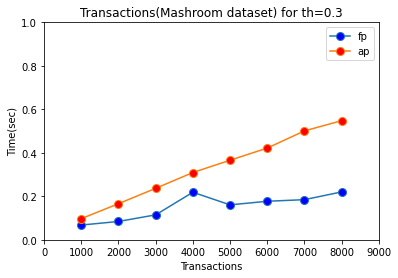

In [131]:
import matplotlib.pyplot as plt

plt.plot(th, fptime,marker='o', markerfacecolor='blue', markersize=8,  label = "fp")
plt.plot(th, aptime,marker='o', markerfacecolor='red', markersize=8,  label = "ap")
plt.ylim(0,1)
plt.xlim(0,9000)
plt.xlabel('Transactions')
plt.ylabel('Time(sec)')
plt.legend()
plt.title('Transactions(Mashroom dataset) for th=0.3')

plt.show()